In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# File name: inflation_plot.py
"""
Created on Thu Jun 28 00:05:20 2018

@author: Neo(liuniu@smail.nju.edu.cn)

"""

import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, deg2rad, sqrt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# My modules
from error_inflation_progs import (
    error_inflation, pos_offset_wrms_soubinned, wrms_calc)

In [2]:
# Load data
datfile = "../logs/pos_diff_cln01.dat"
soulist = np.genfromtxt(datfile, usecols=(0,), dtype=str)
RA, Dec, dRAc, dDec, dRAc_err, dDec_err = np.genfromtxt(
    datfile, usecols=range(1, 7), unpack=True)
num_ses_mean, num_obs_mean = np.genfromtxt(
    datfile, dtype=int, usecols=range(10, 12), unpack=True)


num_ses_mean = num_ses_mean * 2

# Load results of scale factor and noise floor
lab = np.genfromtxt("../logs/nf_sf.dat", usecols=(0,), dtype=str)
# sf_RA, nf_RA, sf_Dec, nf_Dec = np.genfromtxt(
#     "../logs/nf_sf.dat", usecols=(1, 3, 5, 7), unpack=True)

I will only use these with the number of sessions `$N_{sess} >= 10$`.

In [3]:
# Sort the data according to the number of sessions/observations
ind = np.argsort(num_ses_mean)
num_ses_sort = np.take(num_ses_mean, ind)
dRAc_sort = np.take(dRAc, ind)
dDec_sort = np.take(dDec, ind)
dRAc_err_sort = np.take(dRAc_err, ind)
dDec_err_sort = np.take(dDec_err, ind)

# Calculate the positional offset scatter
dRAc_wrms, dRAc_err_med, ses_min_RA = pos_offset_wrms_soubinned(
    num_ses_sort, dRAc_sort, dRAc_err_sort, interv_size=50)
dDec_wrms, dDec_err_med, ses_min_Dec = pos_offset_wrms_soubinned(
    num_ses_sort, dDec_sort, dDec_err_sort, interv_size=50)

In [4]:
# If we use all sources
print("If we choose all %d sources." % dRAc.size)

# scale the position offset by their uncertainty
nor_dRAc = dRAc / dRAc_err
nor_dDec = dDec / dDec_err

# Calculate their standard deviation (scale factor)
sf_ra = np.std(nor_dRAc)
m_ra = np.mean(nor_dRAc)
sf_dec = np.std(nor_dDec)
m_dec = np.mean(nor_dDec)

print("For all sources:\n"
      "     scale factors of RA and Dec. are %.3f and %.3f." % (sf_ra, sf_dec))
print("     mean values are %.3f and %.3f" % (m_ra, m_dec))

# Noise floor for post-elimination sources
nf_ra = wrms_calc(dRAc, dRAc_err) / sqrt(2)
nf_dec = wrms_calc(dDec, dDec_err) / sqrt(2)

print("For all sources:\n"
      "     noise floors of RA and Dec. are %.3f and %.3f mas." % (nf_ra, nf_dec))
print("     means are %.3f and %.3f mas." % (np.mean(dRAc), np.mean(dDec)))

If we choose all 2380 sources.
For all sources:
     scale factors of RA and Dec. are 1.305 and 1.247.
     mean values are -0.020 and 0.028
For all sources:
     noise floors of RA and Dec. are 0.033 and 0.040 mas.
     means are 0.048 and -0.131 mas.


In [5]:
# # wrms difference VS median formal uncertainty (Log-plot)
# fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2, sharex=True)

# ax0.plot(ses_min_RA, dRAc_wrms * 1.e3, "mo", 
#          markersize=2, label="WRMS scatter")
# ax0.plot(ses_min_RA, dRAc_err_med * 1.e3, "g^",
#          markersize=2, label="Median formal error")

# ax1.plot(ses_min_Dec, dDec_wrms * 1.e3, "mo", 
#          markersize=2, label="WRMS scatter")
# ax1.plot(ses_min_Dec, dDec_err_med * 1.e3, "g^",
#          markersize=2, label="Median formal error")

# ax0.set_xscale("log")
# ax0.set_xlabel("$N_{session}$")
# ax0.set_yscale("log")
# ax0.set_ylabel("WRMS scatter in $\\alpha\\,\\cos\\delta$ [$\mu$as]")
# ax0.xaxis.set_ticks_position('both')
# ax0.yaxis.set_ticks_position('both')
# ax0.set_xlim([1, 1100])
# ax0.set_ylim([5, 500])
# ax0.grid(True)
# ax0.legend(loc="upper right", fontsize="small")

# # ax1.set_xscale("log")
# ax1.set_xlabel("$N_{session}$")
# ax1.set_yscale("log")
# ax1.set_ylabel("WRMS scatter in $\\delta$ [$\mu$as]")
# ax1.set_ylim([5, 500])
# ax1.xaxis.set_ticks_position('both')
# ax1.yaxis.set_ticks_position('both')
# ax1.grid(True)
# ax1.legend(loc="upper right", fontsize="small")

# plt.tight_layout()

In [6]:
# Determine the noise floor as the minimum wrms scatter
nf_ra, nf_dec = 0.008, 0.011

In [7]:
# Inflate the formal error

print("For all sources:")
print("     scale factors of RA and Dec. are %.3f and %.3f." % (sf_ra, sf_dec))
print("     noise floors of RA and Dec. are %.3f and %.3f mas.\n" % (nf_ra, nf_dec))

dRAc_err_inf0 = error_inflation(dRAc_err_sort, sf_ra, nf_ra)
dDec_err_inf0 = error_inflation(dDec_err_sort, sf_dec, nf_dec)

# Calculate the positional offset scatter
dRAc_wrms0, dRAc_err_med0, ses_min_RA0 = pos_offset_wrms_soubinned(
    num_ses_sort, dRAc_sort, dRAc_err_inf0, interv_size=50)
dDec_wrms0, dDec_err_med0, ses_min_Dec0 = pos_offset_wrms_soubinned(
    num_ses_sort, dDec_sort, dDec_err_inf0, interv_size=50)

For all sources:
     scale factors of RA and Dec. are 1.305 and 1.247.
     noise floors of RA and Dec. are 0.008 and 0.011 mas.



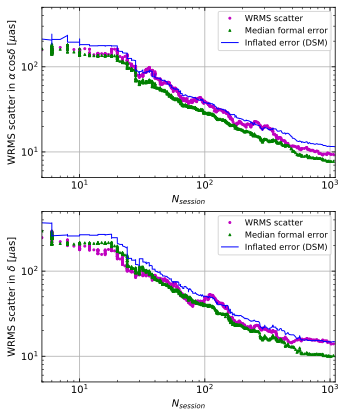

In [8]:
# wrms difference VS median formal uncertainty (Log-plot)
# fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2, sharex=True)
fig, (ax0, ax1) = plt.subplots(figsize=(5, 6), nrows=2)

ax0.plot(ses_min_RA, dRAc_wrms * 1.e3, "mo", 
         markersize=2, label="WRMS scatter")
ax0.plot(ses_min_RA, dRAc_err_med * 1.e3, "g^",
         markersize=2, label="Median formal error")
ax0.plot(ses_min_RA0, dRAc_err_med0 * 1.e3, "b",
         lw=1, label="Inflated error (DSM)")
# ax0.plot(ses_min_RA1, dRAc_err_med1 * 1.e3, "r",
#          lw=1, label="Inflated error (SBL)")

ax1.plot(ses_min_Dec, dDec_wrms * 1.e3, "mo", 
         markersize=2, label="WRMS scatter")
ax1.plot(ses_min_Dec, dDec_err_med * 1.e3, "g^",
         markersize=2, label="Median formal error")
ax1.plot(ses_min_Dec0, dDec_err_med0 * 1.e3, "b",
         lw=1, label="Inflated error (DSM)")
# ax1.plot(ses_min_Dec1, dDec_err_med1 * 1.e3, "r",
#          lw=1, label="Inflated error (SBL)")

ax0.set_xscale("log")
ax0.set_xlabel("$N_{session}$")
ax0.set_yscale("log")
ax0.set_ylabel("WRMS scatter in $\\alpha\\,\\cos\\delta$ [$\mu$as]")
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
# ax0.set_xlim([1, 1100])
ax0.set_xlim([5, 1100])
ax0.set_ylim([5, 500])
ax0.grid(True)
ax0.legend(loc="upper right", fontsize="small")

ax1.set_xscale("log")
ax1.set_xlabel("$N_{session}$")
ax1.set_yscale("log")
ax1.set_ylabel("WRMS scatter in $\\delta$ [$\mu$as]")
# ax1.set_xlim([1, 1100])
ax1.set_xlim([5, 1100])
ax1.set_ylim([5, 500])
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.grid(True)
ax1.legend(loc="upper right", fontsize="small")

plt.tight_layout()
plt.subplots_adjust(hspace=0.2)
# plt.savefig("../plots/DSM.eps")
# plt.savefig("/Users/Neo/Desktop/noise-DSM.png")

In [9]:
med_sess = np.median(num_ses_mean)
print(med_sess)

med_sess = np.median(ses_min_RA0)
print(med_sess)

2.0
2.0


Text(0.5, 1.0, 'Distribution of $N_{session}$')

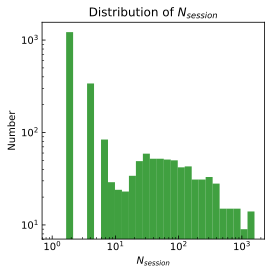

In [10]:
fig, ax = plt.subplots(figsize=(4, 4))
bins_array = 10.0**np.linspace(0, 3.2, 30)
ax.hist(num_ses_mean, bins_array, facecolor="g", alpha=0.75)
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("$N_{session}$")
ax.set_ylabel("Number")

ax.set_title("Distribution of $N_{session}$")

# plt.savefig("/Users/Neo/Desktop/sou_sess_num_hist.png")

Text(0.5, 1.0, 'Distribution of $N_{session}\\,(N_{session}\\geq 10)$')

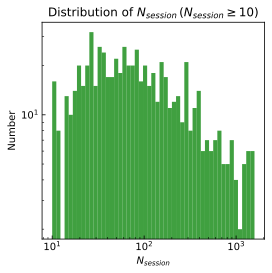

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))
bins_array = 10.0**np.linspace(1, 3.2, 50)
ax.hist(num_ses_mean[num_ses_mean>=10], bins_array, facecolor="g", alpha=0.75)
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("$N_{session}$")
ax.set_ylabel("Number")

ax.set_title("Distribution of $N_{session}\,(N_{session}\geq 10)$")

# plt.savefig("/Users/Neo/Desktop/sou_sess_num_hist.png")

Text(0.5, 1.0, 'Distribution of $N_{session}\\,(N_{session}\\geq 10)$')

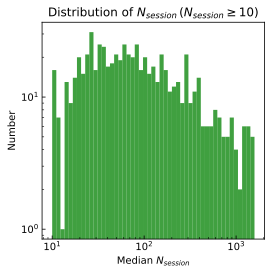

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))
bins_array = 10.0**np.linspace(1, 3.2, 50)
ax.hist(ses_min_RA0[ses_min_RA0>=10], bins_array, facecolor="g", alpha=0.75)
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("Median $N_{session}$")
ax.set_ylabel("Number")

ax.set_title("Distribution of $N_{session}\,(N_{session}\geq 10)$")

# plt.savefig("/Users/Neo/Desktop/median_sess_num_hist.png")